# problem1

In [6]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

v1 = np.array([1, 0, 1, 2])
v2 = np.array([2, 1, 4, 11])
v3 = np.array([3, 0, 3, 6])
v4 = np.array([4, 1, 6, 15])
orig_mat = np.matrix([v1, v2, v3, v4])

v1 = np.array([1, 0, 1, 2, 4])
v2 = np.array([2, 1, 4, 11, 18])
v3 = np.array([3, 0, 3, 6, 12])
v4 = np.array([4, 1, 6, 15, 26])
inspan_mat = np.matrix([v1, v2, v3, v4])

v1 = np.array([1, 0, 1, 2, 1])
v2 = np.array([2, 1, 4, 11, 3])
v3 = np.array([3, 0, 3, 6, 1])
v4 = np.array([4, 1, 6, 15, 4])
nonspan_mat = np.matrix([v1, v2, v3, v4])

orig_reduced = sympy.Matrix(orig_mat).rref()
inspan_reduced = sympy.Matrix(inspan_mat).rref()
nonspan_reduced = sympy.Matrix(nonspan_mat).rref()
print ("Original pivot rows: ",len(orig_reduced[1]))
print ("Matrix 1 pivot rows: ",len(inspan_reduced[1]))
print ("Matrix 2 pivot rows: ",len(nonspan_reduced[1]))


Original pivot rows:  2
Matrix 1 pivot rows:  2
Matrix 2 pivot rows:  3


By making augmented matrixes, from result shown, inspan matrix does not add more pivot rows, however, not inspan matrix add more pivot rows.

1B

In [7]:
rank = len(orig_reduced[1])
print("Subspace rank of matrix: ",rank," for \n{}".format(orig_mat))


Subspace rank of matrix:  2  for 
[[ 1  0  1  2]
 [ 2  1  4 11]
 [ 3  0  3  6]
 [ 4  1  6 15]]


1C

In [8]:
q,r = np.linalg.qr(orig_mat)
print('Orthonormal col basis for the subspace S:\n',q[:, :rank])


Orthonormal col basis for the subspace S:
 [[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


A vector v=(v1,v2,v3,v4)v=(v1,v2,v3,v4) is orthogonal to uu iff v1−v2+v3−v4=0v1−v2+v3−v4=0, or in other words v4=v1−v2+v3
q is a set of orthogonal vectors which span the column space of A. There are posibily countless many basis for subspace S, q is one of them. But we need the basis to consist of columns of A, then you can compute the QR decomposition and throw out the linearly dependent columns. Which means just take up to rank many columns.

~~~~~~~~~
1D Solve the optimization problem minx∈S||x − z∗||2 where z∗ = [1, 0, 0, 0].
~~~~~~~~~

In [16]:
obasis = q[:, :rank].T
v1 = obasis[0]
v2 = obasis[1]
z = [1,0,0,0]
#projwZ =np.matmul(( np.matmul(v1,z)/np.matmul(v1,v1) ),v1)+ np.matmul((np.matmul(v2,z)/np.matmul(v2,v2)),v2)

The set of vectors of the form c1v1 + c2v2 is simply the span of v1 and v2, i.e.,Span{v1, v2}, so to find the best approximation to z by vectors in this span we just need to project z onto it. For notation, let W = Span{v1, v2}, then the best approximation to z will be given by
    projwZ =( v1*z/v1*v1 )v1+ (v2*z/v2*v2)v2



# #2

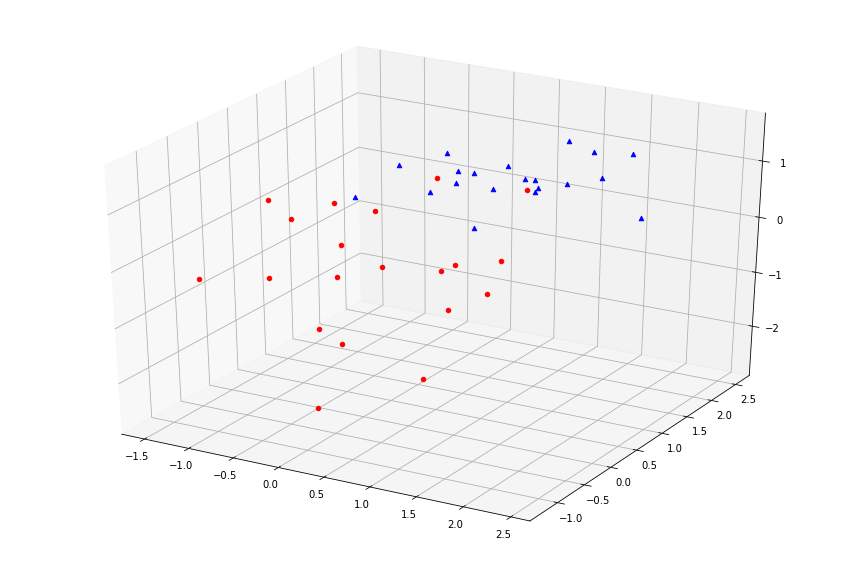

In [25]:
#2.1
from mpl_toolkits.mplot3d import Axes3D

cov_matrix_0 = [[0.5, 0, 0],
             [0, 0.5, 0],
             [0, 0, 0.7]]

cov_matrix_1 = [[0.5, 0, 0],
             [0, 0.5, 0],
             [0, 0, 0.01]]

zero_mean_gauss = np.random.multivariate_normal([0,0,0], cov_matrix_0, 20)
one_mean_gauss = np.random.multivariate_normal([1,1,1], cov_matrix_1, 20)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,20):
    x_0 = zero_mean_gauss[i][0]
    x_1 = one_mean_gauss[i][0]
    y_0 = zero_mean_gauss[i][1]
    y_1 = one_mean_gauss[i][1]
    z_0 = zero_mean_gauss[i][2]
    z_1 = one_mean_gauss[i][2]
    
    ax.scatter(x_0, y_0, z_0, c='r', marker='o')
    ax.scatter(x_1, y_1, z_1, c='b', marker = '^')
    

plt.show()

In [27]:
#2.3
X = np.concatenate((zero_mean_gauss, one_mean_gauss), axis=0)

def find_cov(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    summation = 0
    for (x,y) in zip(X, Y):
        summation += (x - X_mean)*(y - Y_mean)
    covariance = summation/len(X)
    return covariance

dim_x = X[:,0]
dim_y = X[:,1]
dim_z = X[:,2]

var_x = find_cov(dim_x, dim_x)
var_y = find_cov(dim_y, dim_y)
var_z = find_cov(dim_z, dim_z)

cov_xy = find_cov(dim_x, dim_y)
cov_xz = find_cov(dim_x, dim_z)
cov_yz = find_cov(dim_y, dim_z)

cov_matrix = np.matrix([[var_x, cov_xy, cov_xz], [cov_xy, var_y, cov_yz], [cov_xz, cov_yz, var_z]])
print (cov_matrix)



[[ 0.59902718  0.35530294  0.24557909]
 [ 0.35530294  0.76722018  0.37767642]
 [ 0.24557909  0.37767642  0.88668148]]


In [28]:
#2.4

# problem3

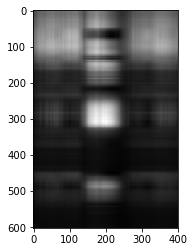

size of picture: 7718400 bits


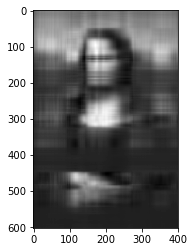

size of picture: 19296000 bits


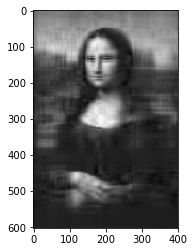

size of picture: 38592000 bits


In [24]:
from scipy import misc

#import matplotlib.pyplot as plt
#plt.imshow(pic, cmap=plt.cm.gray)
#plt.imshow(pic)

for i in [2,5,10]:
    pic = misc.imread('mona_lisa.png',flatten=True) # uses the Image module (PIL)
    u, s, v = np.linalg.svd(pic)
    s[i:] = 0
    Diag = np.zeros(pic.shape)
    Diag[:400, :400] = np.diag(s)
    plt.imshow(np.matmul(np.matmul(u, Diag), v), cmap=plt.cm.gray)
    plt.show()
    print("size of picture: %s bits"%(pic.shape[0]*pic.shape[1]*i*2*8))
